In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel("Emissions_weatherevents.xlsx")
data2 = pd.read_csv("Population_growth.csv")

In [3]:
data1.head()

,Country Code,Country name,Series code,"CO2 emissions, total (KtCO2)",Total greenhouse gas emissions (% change from 1990),"Droughts, floods, extreme temps (% pop. avg. 1990-2009)"
0,ABW,Aruba,EN.ATM.CO2E.KT,2013.955000,NaN,NaN
1,ADO,Andorra,EN.ATM.CO2E.KT,512.070357,NaN,NaN
2,AFG,Afghanistan,EN.ATM.CO2E.KT,1092.766000,11.476205,1.059290
3,AGO,Angola,EN.ATM.CO2E.KT,11526.346000,-21.574367,1.011765
4,ALB,Albania,EN.ATM.CO2E.KT,3384.641000,-33.026241,5.269577


In [4]:
data1.shape

(233, 6)

In [5]:
data2.head()

,Country Name,Country Code,Population growth %annual(1961-2022)
0,Aruba,ABW,1.076529077
1,Africa Eastern and Southern,AFE,2.792535931
2,Afghanistan,AFG,2.519898029
3,Africa Western and Central,AFW,2.643783059
4,Angola,AGO,3.054186643


In [6]:
data2.shape

(266, 3)

In [7]:
#Merging datasets
final_data = pd.merge(data1,data2, on = 'Country Code', how = 'inner')
final_data.head()

,Country Code,Country name,Series code,"CO2 emissions, total (KtCO2)",Total greenhouse gas emissions (% change from 1990),"Droughts, floods, extreme temps (% pop. avg. 1990-2009)",Country Name,Population growth %annual(1961-2022)
0,ABW,Aruba,EN.ATM.CO2E.KT,2013.955,NaN,NaN,Aruba,1.076529077
1,AFG,Afghanistan,EN.ATM.CO2E.KT,1092.766,11.476205,1.059290,Afghanistan,2.519898029
2,AGO,Angola,EN.ATM.CO2E.KT,11526.346,-21.574367,1.011765,Angola,3.054186643
3,ALB,Albania,EN.ATM.CO2E.KT,3384.641,-33.026241,5.269577,Albania,0.879662307
4,ARE,United Arab Emirates,EN.ATM.CO2E.KT,87808.052,81.498282,NaN,United Arab Emirates,6.869812633


In [8]:
final_data.shape

(222, 8)

In [9]:
#Cleaning data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Country Code                                             222 non-null    object 
 1   Country name                                             222 non-null    object 
 2   Series code                                              222 non-null    object 
 3   CO2 emissions, total (KtCO2)                             208 non-null    float64
 4   Total greenhouse gas emissions (% change from 1990)      199 non-null    float64
 5   Droughts, floods, extreme temps (% pop. avg. 1990-2009)  155 non-null    float64
 6   Country Name                                             222 non-null    object 
 7   Population growth %annual(1961-2022)                     222 non-null    object 
dtypes: float64(3), object(5)
memory

In [10]:
final_data.columns

Index(['Country Code', 'Country name', 'Series code',
       'CO2 emissions, total (KtCO2)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Droughts, floods, extreme temps (% pop. avg. 1990-2009)',
       'Country Name', 'Population growth %annual(1961-2022)'],
      dtype='object')

In [170]:
#Remving white spaces before and after column names
final_data.columns = final_data.columns.str.strip()

In [11]:
#Renaming columns
columns_mapping ={
    'Country Code': 'country_code',
     'Country name': 'country_name',
    'Series code':'series_code',
    'CO2 emissions, total (KtCO2)':'CO2_emissions',
    'Total greenhouse gas emissions (% change from 1990)':'greenhouse_emissions',
    'Droughts, floods, extreme temps (% pop. avg. 1990-2009)':'extreme_events',
    'Country Name':'country_name1',
    'Population growth %annual(1961-2022)':'population_growth'
}
final_data = final_data.rename(columns = columns_mapping)
final_data.sample(5, random_state = 999)

,country_code,country_name,series_code,CO2_emissions,greenhouse_emissions,extreme_events,country_name1,population_growth
214,VNM,Vietnam,EN.ATM.CO2E.KT,58653.279,93.459617,1.599362,Vietnam,1.77247239
140,MNP,Northern Mariana Islands,EN.ATM.CO2E.KT,NaN,76.662002,NaN,Northern Mariana Islands,2.805563803
40,COM,Comoros,EN.ATM.CO2E.KT,89.166,38.928242,0.022191,Comoros,2.35050601
26,BRB,Barbados,EN.ATM.CO2E.KT,1141.209,1.768763,NaN,Barbados,0.308881695
143,MUS,Mauritius,EN.ATM.CO2E.KT,2558.987,8.062041,NaN,Mauritius,1.005910416


In [12]:
final_data['population_growth'] = final_data['population_growth'].astype('float')

In [13]:
#dropping unwanted or duplicate columns
final_data.drop(columns = ['series_code','country_name1'], inplace= True)

In [14]:
final_data.head()

,country_code,country_name,CO2_emissions,greenhouse_emissions,extreme_events,population_growth
0,ABW,Aruba,2013.955,NaN,NaN,1.076529
1,AFG,Afghanistan,1092.766,11.476205,1.059290,2.519898
2,AGO,Angola,11526.346,-21.574367,1.011765,3.054187
3,ALB,Albania,3384.641,-33.026241,5.269577,0.879662
4,ARE,United Arab Emirates,87808.052,81.498282,NaN,6.869813


In [15]:
#missing values
final_data.isnull().sum()

country_code             0
country_name             0
CO2_emissions           14
greenhouse_emissions    23
extreme_events          67
population_growth        0
dtype: int64

In [16]:
final_data.shape

(222, 6)

In [17]:
final_data = final_data.fillna(0)

In [18]:
final_data.isnull().sum()

country_code            0
country_name            0
CO2_emissions           0
greenhouse_emissions    0
extreme_events          0
population_growth       0
dtype: int64

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_code          222 non-null    object 
 1   country_name          222 non-null    object 
 2   CO2_emissions         222 non-null    float64
 3   greenhouse_emissions  222 non-null    float64
 4   extreme_events        222 non-null    float64
 5   population_growth     222 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.1+ KB


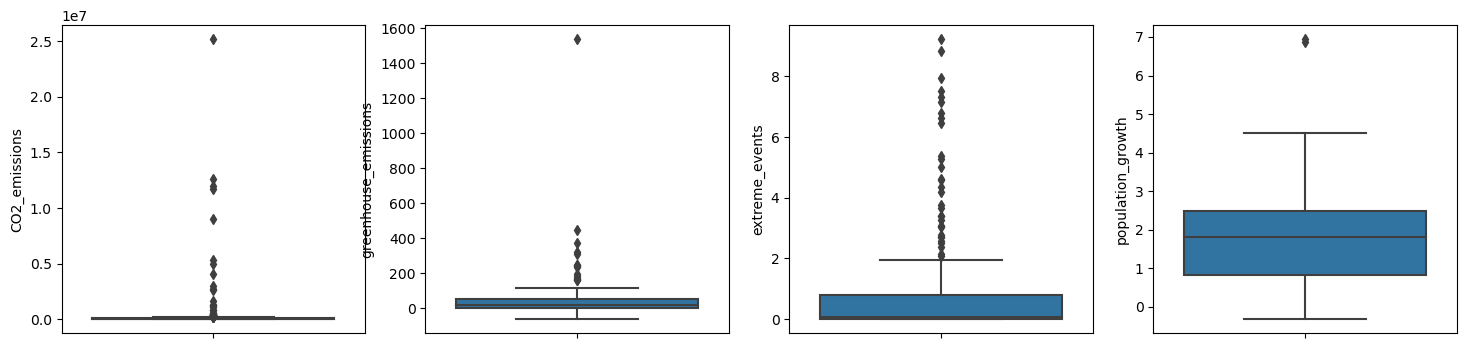

In [20]:
#check for outliers
columns = ['CO2_emissions','greenhouse_emissions','extreme_events','population_growth']
i=1
plt.figure(figsize =(18,4))
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data = final_data)
    i +=1   

In [21]:
from scipy.stats import boxcox
import numpy as np

# List of columns with outliers and potential negative values
columns_to_transform = ['CO2_emissions','greenhouse_emissions','extreme_events']

# Apply Box-Cox transformation to each column
for col in columns_to_transform:
    shift_constant = abs(final_data[col].min()) + 1
    transformed_data, lambda_value = boxcox(final_data[col] + shift_constant)
    final_data[f'{col}'] = transformed_data


In [22]:
final_data.head()

,country_code,country_name,CO2_emissions,greenhouse_emissions,extreme_events,population_growth
0,ABW,Aruba,8.878707,6.984749,0.000000,1.076529
1,AFG,Afghanistan,8.062851,7.436105,0.396659,2.519898
2,AGO,Angola,11.319306,5.927653,0.390460,3.054187
3,ALB,Albania,9.587351,5.178551,0.518404,0.879662
4,ARE,United Arab Emirates,14.381230,9.406156,0.000000,6.869813


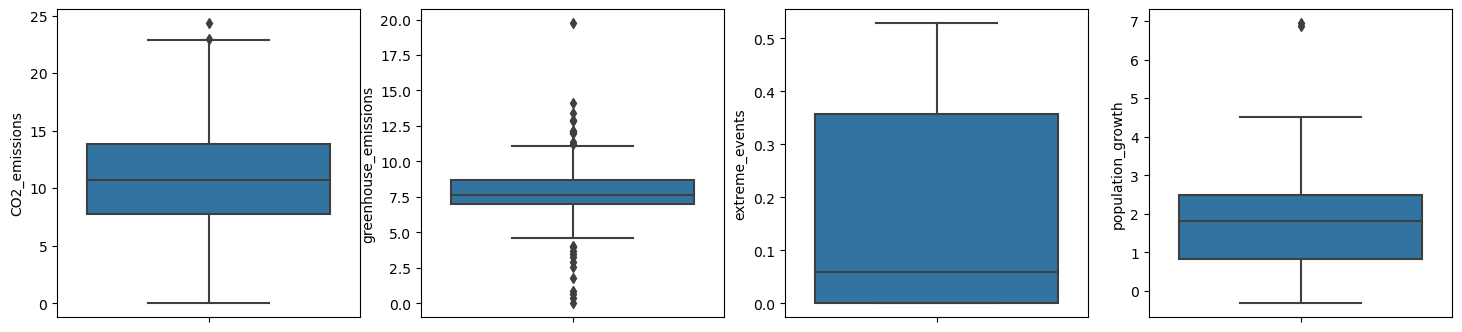

In [23]:
#check for outliers
columns = ['CO2_emissions','greenhouse_emissions','extreme_events','population_growth']
i=1
plt.figure(figsize =(18,4))
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data = final_data)
    i +=1 

### Data Modelling

#### Scaling of features

In [25]:
from sklearn import preprocessing
Data_df = final_data.copy()
non_numerical_columns = ['country_code','country_name']
data_for_scaling = Data_df.drop(columns = non_numerical_columns)

Data_scaler = preprocessing.MinMaxScaler()
scaled_data = Data_scaler.fit_transform(data_for_scaling)
Data_df[data_for_scaling.columns] = scaled_data

In [26]:
Data_df.head()

,country_code,country_name,CO2_emissions,greenhouse_emissions,extreme_events,population_growth
0,ABW,Aruba,0.364826,0.353639,0.000000,0.191888
1,AFG,Afghanistan,0.331302,0.376491,0.750059,0.390693
2,AGO,Angola,0.465110,0.300118,0.738338,0.464284
3,ALB,Albania,0.393944,0.262191,0.980272,0.164772
4,ARE,United Arab Emirates,0.590924,0.476235,0.000000,0.989835


In [27]:
Data_df.shape

(222, 6)

### Corelation analysis

In [28]:
target_column = 'extreme_events'
correlation_matrix = Data_df.corr()
correlation_with_target = correlation_matrix[target_column]
sorted_correlations = correlation_with_target.abs().sort_values(ascending = False)
print(sorted_correlations)


extreme_events          1.000000
population_growth       0.243258
greenhouse_emissions    0.157569
CO2_emissions           0.068085
Name: extreme_events, dtype: float64


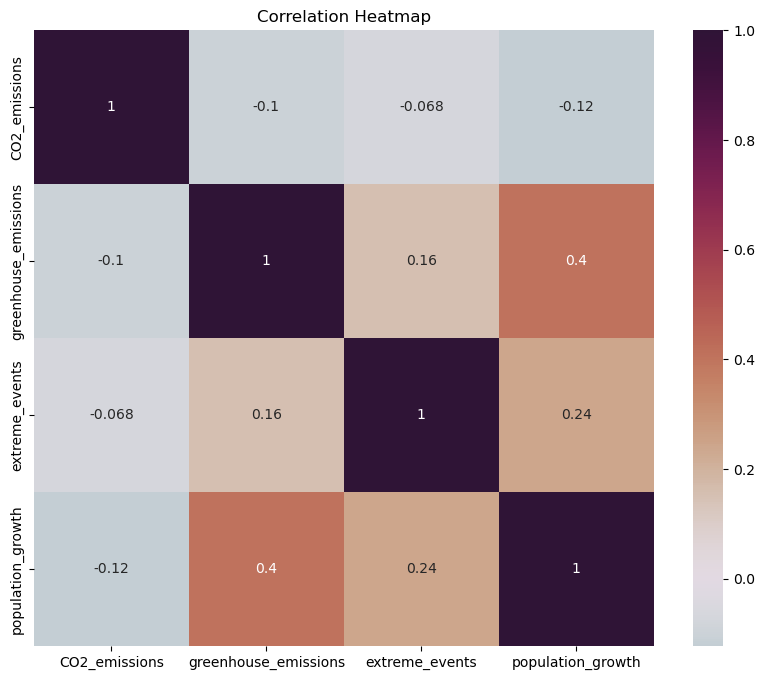

In [29]:
#Heatmap to visualise correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot = True, cmap ='twilight_shifted',center = 0)
plt.title('Correlation Heatmap')
plt.show()

### Modelling using ML algorithms


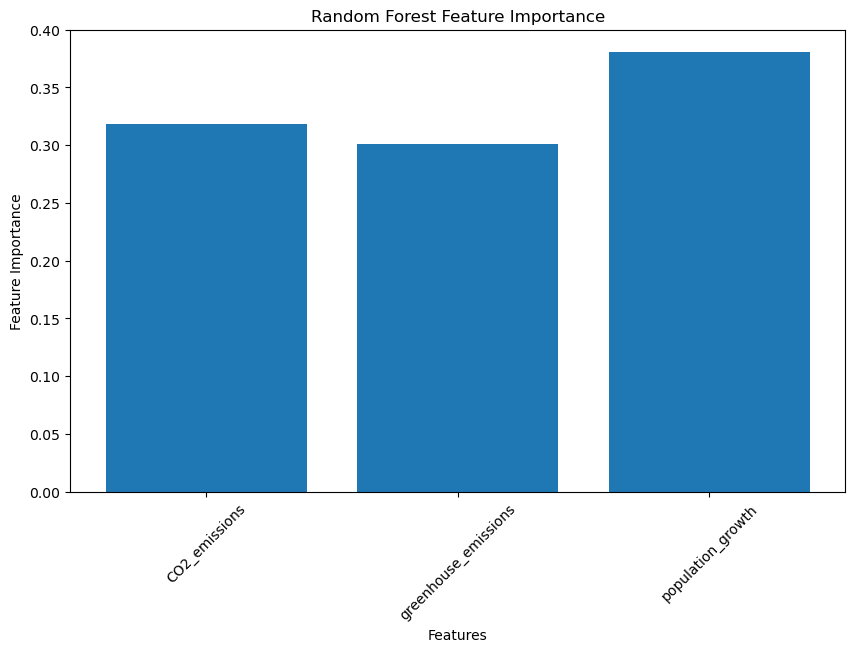

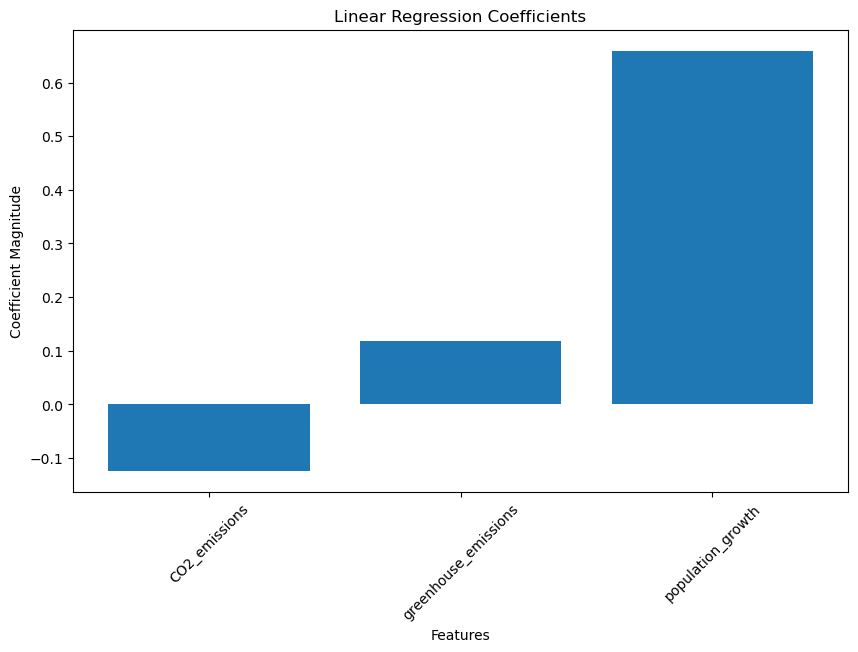

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming Data_df is your DataFrame with features and target
# Replace 'target_column' with the name of your target column
target_column = 'extreme_events'

data_for_ml = Data_df.drop(columns = non_numerical_columns)

# Split data into features and target
X = data_for_ml.drop(columns=[target_column])
y = data_for_ml[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get feature importances from Random Forest model
rf_feature_importances = rf_model.feature_importances_

# Get coefficients from Linear Regression model
lr_coefficients = lr_model.coef_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_feature_importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize coefficients from Linear Regression model
plt.figure(figsize=(10, 6))
plt.bar(X.columns, lr_coefficients)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Linear Regression Coefficients')
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming Data_df is your DataFrame with features and target
# Replace 'target_column' with the name of your target column
target_column = 'extreme_events'

# Split data into features and target
X = data_for_ml.drop(columns=[target_column])
y = data_for_ml[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernel types
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.17414025506065356


Mean Squared Error: 0.12474190922889743


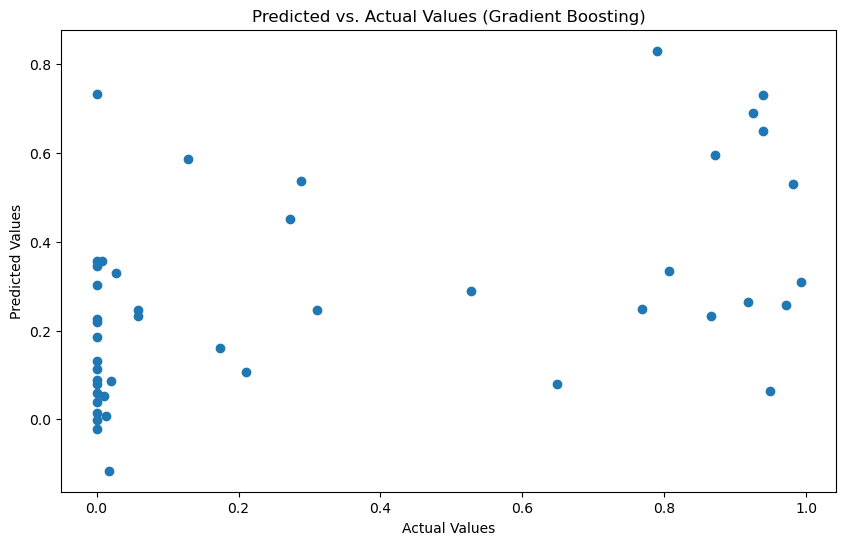

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming Data_df is your DataFrame with features and target
# Replace 'target_column' with the name of your target column
target_column = 'extreme_events'

# Split data into features and target
X = data_for_ml.drop(columns=[target_column])
y = data_for_ml[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Gradient Boosting)')
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming lr_model is your trained Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared (R2): {r2_lr}")


Linear Regression:
Mean Squared Error (MSE): 0.16635889240785456
Root Mean Squared Error (RMSE): 0.40787117133704676
Mean Absolute Error (MAE): 0.3661055915927781
R-squared (R2): -0.06652181564307025


In [34]:
# Assuming rf_model is your trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")


Random Forest:
Mean Squared Error (MSE): 0.1300773657336853
Root Mean Squared Error (RMSE): 0.3606623985581049
Mean Absolute Error (MAE): 0.2792199513325433
R-squared (R2): 0.16607795190028762
